In [ ]:
# function ClickConnect(){
#     console.log("런타임 끊김 방지"); 
#     document.querySelector("colab-toolbar-button#connect").click() 
# }
# setInterval(ClickConnect, 60 * 1000)

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

folder = '/content/drive/MyDrive/Colab Notebooks/1s'


Mounted at /content/drive


In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost
# !pip install lightgbm
# !pip install sklearn
# !pip install graphviz

# 라이브러리 임포트
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn

In [ ]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# EDA

## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/train.csv')
df = pd.read_csv(os.path.join(folder, 'train.csv'))
df.head(20)

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.00,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.00,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.00,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.00,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.00,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1
5,0.1318,90000.00,3.48,7,0,0,2903,31,0,0,0,19548,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,7000,7000.0,0.0,1,7,236.47,0.854,0.0,0.0,1330.30,660,664,0
6,0.0791,60000.00,17.34,0,0,0,20399,35,0,0,0,117320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,20000,20000.0,0.0,1,18,625.90,0.369,0.0,0.0,2567.44,750,754,0
7,0.0975,79600.00,15.97,3,0,1,6481,17,0,0,0,18757,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,23800,23800.0,0.0,1,7,765.17,0.745,0.0,0.0,3006.76,680,684,0
8,0.0789,150000.00,7.36,1,0,0,15827,38,0,0,543,367504,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,16000,16000.0,0.0,1,19,500.58,0.334,0.0,0.0,1286.38,665,669,0
9,0.0999,95000.00,25.78,0,1,0,17870,37,0,0,0,273776,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,24,258.10,0.764,0.0,0.0,796.59,665,669,0


# EDA

In [ ]:
df.info()

In [ ]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,250.588120,1.305281e+05,0.009630,19.288330,0.063820,0.065400,0.326240,0.089410,0.08058,0.059480,0.060710,0.046640,0.045320,0.045690,0.038570,0.075550,0.066410,0.000330,0.466120,0.000070,0.000050,0.110880,0.422550,0.321800,0.390200,0.288000,0.009620,0.226720,0.582810,0.0,0.060400,0.004250,0.019830,0.01101,0.007310,0.058200,0.000650,0.011250,0.007070,0.000880,0.434430,0.565570,0.489320,0.052360,0.060090,0.045700,0.050750,0.048560,0.051340,0.053430,0.048960,0.050030,0.049460,13735.317750,13729.341073,2.448885e+00,0.855920,11.620700,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660,0.325690
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,2042.770881,1.503326e+05,0.110079,893.304366,0.468027,0.247232,0.468839,0.285336,0.27219,0.236522,0.238799,0.210868,0.208006,0.208813,0.192569,0.264278,0.248999,0.018163,0.498853,0.008366,0.007071,0.313985,0.493968,0.467169,0.487797,0.452833,0.097609,0.418712,0.493097,0.0,0.238228,0.065054,0.139417,0.10435,0.085186,0.234122,0.025487,0.105468,0.083786,0.029652,0.495684,0.495684,0.499888,0.222753,0.237655,0.208835,0.219488,0.214947,0.220691,0.224891,0.215786,0.218008,0.216828,8464.825314,8461.694483,1.489496e+01,0.351173,5.458774,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584,0.468634
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,

In [ ]:
# 결측치 확인
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Non-Null Count'}).T

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
Non-Null Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 라벨(depvar) 비율 확인
print('y=1 ratio :', df.depvar.sum()/len(df))

y=1 ratio : 0.32569


#데이터 시각화

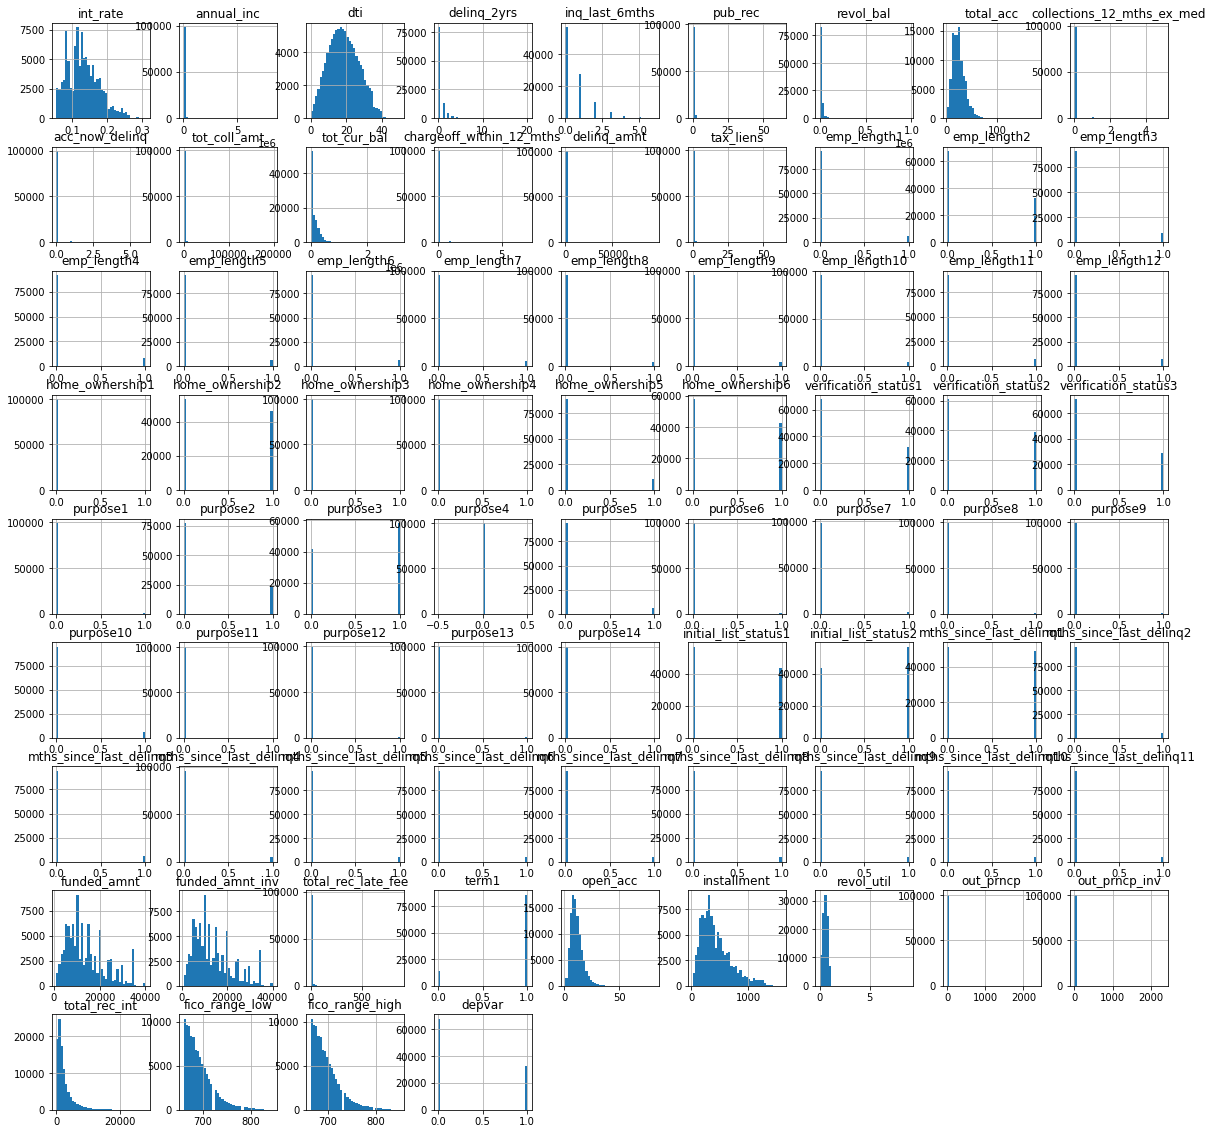

In [ ]:
df.hist(bins=40 , figsize=(20,20)) #Pandas Hist function
plt.show()

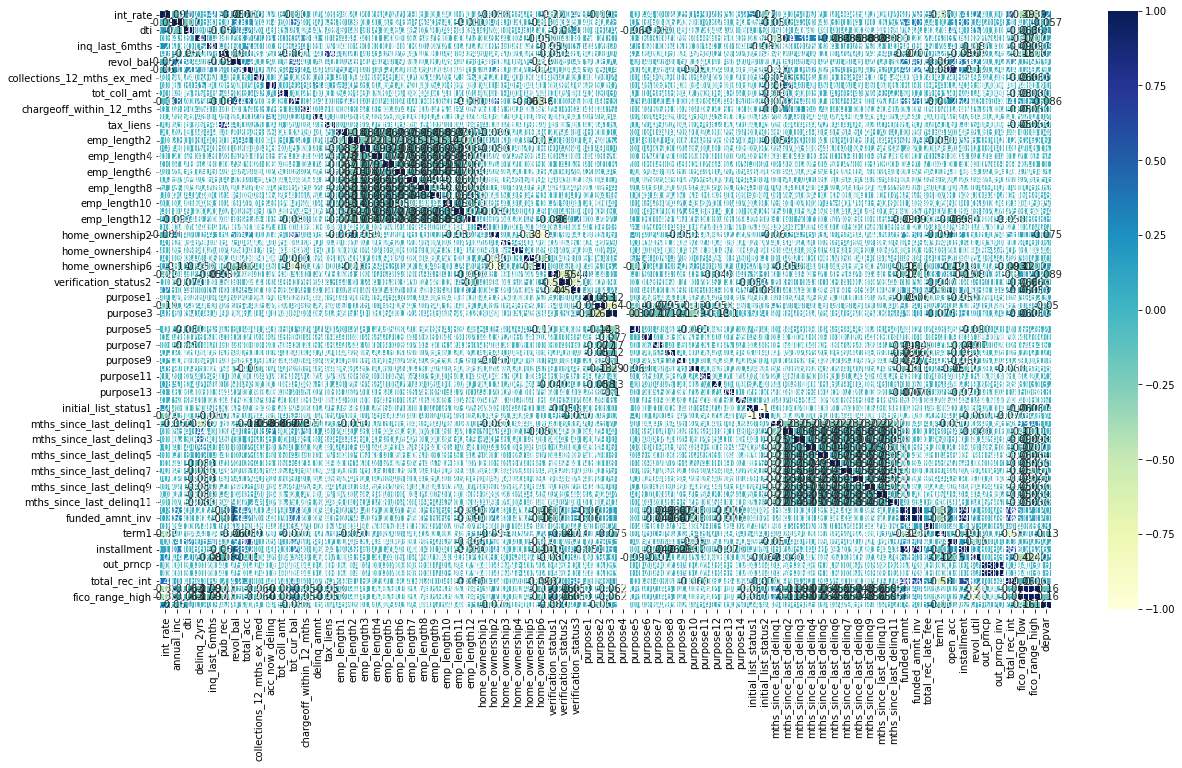

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5, annot=True )
plt.yticks(rotation=0)
plt.show()

In [ ]:
import seaborn as sns
df_see = df.drop()
sns.set(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)

g.map_upper(sns.regplot)

display(g.fig)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2028683050> (for post_execute):


KeyboardInterrupt: ignored

# Train Valid Split

In [ ]:
X = df.drop('depvar', axis=1)
y = df['depvar']

In [ ]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
# X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5)


In [ ]:
# training set과 validation set의 데이터 수 확인
print('training set length :', len(X_train))
print('validation set length :', len(X_valid))
# print('test set length :', len(X_test))

training set length : 80000
validation set length : 20000


In [ ]:
# validation set의 라벨 비율 확인
print(y_valid.sum()/len(y_valid))
# print(y_test.sum()/len(y_test))


0.3286


In [ ]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도accuracy: {:.4f}'.format(accuracy))
    print('정밀도precision: {:.4f}'.format(precision))
    print('재현율recall: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')
    return {'정확도accuracy' : accuracy, '정밀도precision': precision, '재현율recall': recall, 'AUC': AUC, 'F1': F1}

# Single Model(XGBoost)
## XGBClassifier의 하이퍼 파라미터 설명
- **LINK** : https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier
- **max_depth=3** : 디시전 트리의 최대 깊이
- **learning_rate=0.1** : 0과 1 사이의 값을 가지는 부스팅에 대한 학습률(eta). 매 부스팅 단계 이후 새로이 추가된 가중치는 이 파라미터로 조정된다. 이 값이 낮을수록 보수적이며, 수렴에 필요한 더 많은 디시전 트리가 필요하다.
- **n_estimators=100** : 라운드의 횟수 또는 부스팅된 디시전 트리의 개수
- **silent=True** : 부스팅의 수행 동안 메시지를 출력할지에 대한 여부
- **objective="reg:linear"** : 모델이 학습할 작업의 분류, 미리 정의된 작업은 문자열로 지정이 가능하지만, 그렇지 않은 경우 콜러블callable을 만들어서 지정할 수도 있다.
- **booster="gbtree"** : 'gbtree', 'gblinear', 'dart'일 수 있다. 'dart'는 드롭아웃(dropout)이라는 특성을 추가한다(과적합 방지를 위해 무작위로 디시전 트리를 선택해 제거(드롭)한다). 'gblinear'는 정규화된 선형 모델을 만든다(디시전 트리가 아니라 라소 회귀와 유사하다).
- **nthread=None** : 더 이상 사용되지 않는다.
- **n_jobs** : 사용할 스레드의 개수
- **gamma=0** : 노드 분할에 필요한 최소 손실 감소
- **min_child_weight=1** : 자식 노드 생성에 필요한 헤시안(hessian) 합의 최솟값
- **max_delta_step=0** : 보다 보수적으로 갱신을 수행하도록 만드는 값. 불균형 범주의 데이터셋에 대해서는 1부터 10까지의 값으로 설정한다.
- **subsample=1** : 부스팅에 사용할 샘플의 비율
- **colsample_bytree=1** : 부스팅에 사용할 특징 열의 비율
- **colsample_bylevel=1** : 각 디시전 트리의 수준별 사용할 특징 열의 비율
- **colsample_bynode=1** : 각 디시전 트리의 노드별 사용할 특징 열의 비율
- **reg_alpha=0** : L1 정규화(가중치의 평균). 이 값이 클수록 보수적이게 된다.
- **reg_lambda=1** : L2 정규화(가중치의 제곱근). 이 값이 클수록 보수적이게 된다.
- **base_score=.5** : 초기 편향치(bias)
- **seed=None** : 더 이상 사용되지 않는다.
- **random_state=0** : 난수 생성 시드
- **missing=None** : 누락된 데이터가 해석될 값. None은 np.nan을 의미한다.
- **importance_type='gain'** : 특징 중요도의 유형. 'gain', 'weight', 'cover', 'total_gain', 'total_cover'로 설정될 수 있다.

In [ ]:
# 하이퍼 파라미터 튜닝
xgb_clf = xgboost.XGBClassifier().to(DEVICE)

param_grid = {'max_depth':[5],
              'n_estimators': list(range(290,300,3))}

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='accuracy', 
                           error_score=0) 

results=grid_search.fit(X_train, y_train)

results.best_params_

{'max_depth': 5, 'n_estimators': 299}

In [ ]:
# best parameter를 사용하여 prediction 수행
xgb_clf = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
                                n_estimators = results.best_params_['n_estimators'],
                                eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_valid)

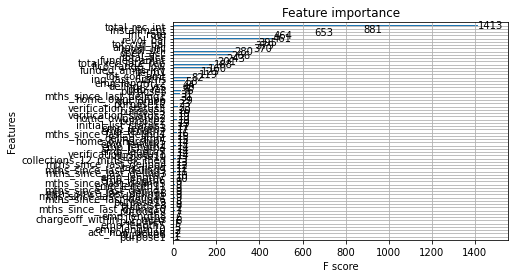

In [ ]:
import xgboost as xgb

xgb.plot_importance(xgb_clf)

In [ ]:
# y_valid가 0 또는 1일 확률 출력
y_pred_prob = xgb_clf.predict_proba(X_valid)

print(len(y_pred_prob))
y_pred_prob

20000


array([[0.94704014, 0.05295987],
       [0.8450413 , 0.1549587 ],
       [0.9418128 , 0.05818719],
       ...,
       [0.506757  , 0.49324298],
       [0.3173554 , 0.6826446 ],
       [0.72451305, 0.27548695]], dtype=float32)

In [ ]:
# y_valid가 1일 확률 출력
y_pred_prob[:,1]

array([0.05295987, 0.1549587 , 0.05818719, ..., 0.49324298, 0.6826446 ,
       0.27548695], dtype=float32)

In [ ]:
# y_valid 예측값 출력
# y_pred_prob[:,1]이 0.5(threshold)보다 큰 경우 1의 예측값을 return한다

print(len(y_pred_xgb))
y_pred_xgb

20000


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# 1로 예측된 y_valid 갯수 및 비율 출력
print(y_pred_xgb.sum())
print(y_pred_xgb.sum()/len(y_pred_xgb))

3391
0.16955



정확도: 0.7502
정밀도: 0.6640
재현율: 0.4746
AUC: 0.6791
F1: 0.5535


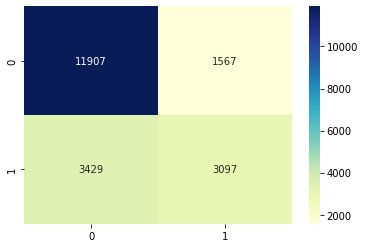

In [ ]:
# xgboost 성능 확인
get_clf_eval(y_valid, y_pred_xgb)


정확도: 0.7399
정밀도: 0.6191
재현율: 0.5273
AUC: 0.6851
F1: 0.5695


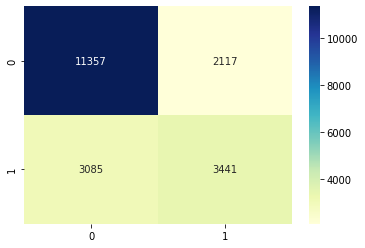

In [ ]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

#cockpit   
https://cockpit.readthedocs.io/en/latest/examples/01_basic_fmnist.html

In [ ]:
# !pip install cockpit-for-pytorch


In [ ]:
# from cockpit import Cockpit, CockpitPlotter
# from cockpit.utils.configuration import configuration


# # Create Cockpit and a plotter
# cockpit = Cockpit(model.parameters(), quantities=configuration("full"))
# plotter = CockpitPlotter()

# TabNet    
https://wsshin.tistory.com/5   
https://dreamquark-ai.github.io/tabnet/generated_docs/README.html#tabnet-attentive-interpretable-tabular-learning   
https://github.com/dreamquark-ai/tabnet

In [ ]:
!pip install pytorch-tabnet

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor


In [ ]:
y_train

83353    1
4999     1
61358    0
13085    1
23975    0
        ..
31044    0
86081    1
6110     0
3412     0
3431     0
Name: depvar, Length: 80000, dtype: int64

In [ ]:
X_train

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high
83353,0.1465,54798.0,22.03,0,1,1,9097,50,0,0,2297,40041,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1500,1500.0,0.00,1,17,51.75,0.551,0.0,0.0,161.09,660,664
4999,0.1580,40000.0,25.47,0,1,0,16590,19,0,0,0,28581,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.00,1,16,350.59,0.389,0.0,0.0,1280.62,675,679
61358,0.1727,64000.0,25.18,0,0,0,2292,19,0,0,0,102546,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,28000,28000.0,0.00,1,14,1002.05,0.137,0.0,0.0,6062.22,740,744
13085,0.1953,40000.0,20.07,0,0,2,9556,21,0,0,0,24255,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,8650,8650.0,0.00,1,11,319.40,0.613,0.0,0.0,2652.09,665,669
23975,0.1588,83000.0,15.44,0,0,0,11057,25,0,0,0,148352,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,23750,23675.0,0.00,0,12,576.05,0.970,0.0,0.0,6376.44,670,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31044,0.0790,140000.0,7.20,0,1,0,38490,31,0,0,427,187763,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,12000,11975.0,0.00,1,13,375.49,0.437,0.0,0.0,1517.36,690,694
86081,0.1147,63696.0,13.94,0,1,1,4082,35,0,0,842,17083,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,6000,6000.0,0.00,1,10,197.78,0.537,0.0,0.0,1015.77,685,689
6110,0.1499,130000.0,21.63,0,1,2,13231,32,0,0,0,72988,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,20000,20000.0,34.66,1,11,693.21,0.769,0.0,0.0,5171.91,690,694
3412,0.1399,25000.0,28.30,1,0,0,5439,19,0,0,0,42909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,8400,8400.0,0.00,1,11,287.06,0.363,0.0,0.0,1134.94,670,674


In [ ]:
from sklearn.preprocessing import LabelEncoder

nunique = X_train.nunique()
categorical_columns = []
categorical_dims =  {}
categorical_dims_all = {}
for col in X_train.columns:
    l_enc = LabelEncoder()
    X_train[col] = l_enc.fit_transform(X_train[col].values)        
    categorical_columns.append(col)
    categorical_dims_all[col] = len(l_enc.classes_)
categorical_columns = []
for col in X_train.columns:
    if nunique[col] < 20:
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)

In [ ]:
print(X_train.columns)
print(len(X_train.columns))

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [ ]:
print(categorical_dims_all)
print(len(categorical_dims_all))

{'int_rate': 256, 'annual_inc': 7419, 'dti': 4105, 'delinq_2yrs': 20, 'inq_last_6mths': 7, 'pub_rec': 20, 'revol_bal': 32817, 'total_acc': 105, 'collections_12_mths_ex_med': 6, 'acc_now_delinq': 5, 'tot_coll_amt': 3426, 'tot_cur_bal': 66963, 'chargeoff_within_12_mths': 6, 'delinq_amnt': 275, 'tax_liens': 20, 'emp_length1': 2, 'emp_length2': 2, 'emp_length3': 2, 'emp_length4': 2, 'emp_length5': 2, 'emp_length6': 2, 'emp_length7': 2, 'emp_length8': 2, 'emp_length9': 2, 'emp_length10': 2, 'emp_length11': 2, 'emp_length12': 2, 'home_ownership1': 2, 'home_ownership2': 2, 'home_ownership3': 2, 'home_ownership4': 2, 'home_ownership5': 2, 'home_ownership6': 2, 'verification_status1': 2, 'verification_status2': 2, 'verification_status3': 2, 'purpose1': 2, 'purpose2': 2, 'purpose3': 2, 'purpose4': 1, 'purpose5': 2, 'purpose6': 2, 'purpose7': 2, 'purpose8': 2, 'purpose9': 2, 'purpose10': 2, 'purpose11': 2, 'purpose12': 2, 'purpose13': 2, 'purpose14': 2, 'initial_list_status1': 2, 'initial_list_st

In [ ]:
print(categorical_columns)
print(len(categorical_columns))

['inq_last_6mths', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'emp_length1', 'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4', 'home_ownership5', 'home_ownership6', 'verification_status1', 'verification_status2', 'verification_status3', 'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13', 'purpose14', 'initial_list_status1', 'initial_list_status2', 'mths_since_last_delinq1', 'mths_since_last_delinq2', 'mths_since_last_delinq3', 'mths_since_last_delinq4', 'mths_since_last_delinq5', 'mths_since_last_delinq6', 'mths_since_last_delinq7', 'mths_since_last_delinq8', 'mths_since_last_delinq9', 'mths_since_last_delinq10', 'mths_since_last_delinq11', 'term1']
53


In [ ]:
print(categorical_dims)
print(len(categorical_dims))

{'inq_last_6mths': 38, 'collections_12_mths_ex_med': 38, 'acc_now_delinq': 38, 'chargeoff_within_12_mths': 38, 'emp_length1': 38, 'emp_length2': 38, 'emp_length3': 38, 'emp_length4': 38, 'emp_length5': 38, 'emp_length6': 38, 'emp_length7': 38, 'emp_length8': 38, 'emp_length9': 38, 'emp_length10': 38, 'emp_length11': 38, 'emp_length12': 38, 'home_ownership1': 38, 'home_ownership2': 38, 'home_ownership3': 38, 'home_ownership4': 38, 'home_ownership5': 38, 'home_ownership6': 38, 'verification_status1': 38, 'verification_status2': 38, 'verification_status3': 38, 'purpose1': 38, 'purpose2': 38, 'purpose3': 38, 'purpose4': 38, 'purpose5': 38, 'purpose6': 38, 'purpose7': 38, 'purpose8': 38, 'purpose9': 38, 'purpose10': 38, 'purpose11': 38, 'purpose12': 38, 'purpose13': 38, 'purpose14': 38, 'initial_list_status1': 38, 'initial_list_status2': 38, 'mths_since_last_delinq1': 38, 'mths_since_last_delinq2': 38, 'mths_since_last_delinq3': 38, 'mths_since_last_delinq4': 38, 'mths_since_last_delinq5': 

In [ ]:
features = [ col for col in X_train.columns ]
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [ ]:
cat_idxs

In [ ]:
cat_dims

In [ ]:
clf

TabNetClassifier(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 66], cat_dims=[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], cat_emb_dim=10, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01}, scheduler_fn=<class 'torch.optim.lr_scheduler.StepLR'>, scheduler_params={'step_size': 50, 'gamma': 0.9}, mask_type='sparsemax', input_dim=None, output_dim=None, device_name='auto')

In [ ]:
X_valid


In [ ]:
X_train

In [ ]:
(X_train, y_train)

(       int_rate  annual_inc  ...  fico_range_low  fico_range_high
 43860       110        4038  ...               6                6
 35751       136        4552  ...               0                0
 61467        59        2155  ...               9                9
 34618        63        5590  ...               3                3
 1605        126         757  ...               7                7
 ...         ...         ...  ...             ...              ...
 25228       164        5017  ...               5                5
 51319         6        2991  ...              16               16
 81351        36        6796  ...               3                3
 21441       107        1013  ...               2                2
 27677        52        1852  ...               5                5
 
 [80000 rows x 75 columns], 43860    0
 35751    0
 61467    0
 34618    1
 1605     0
         ..
 25228    1
 51319    0
 81351    0
 21441    0
 27677    1
 Name: depvar, Length: 80000, dtype

In [ ]:
# eval metric, epoc at Ir=1e-2
li100 = []

for change in ['auc', 'accuracy', 'balanced_accuracy', 'logloss']:
    for epoc in [100]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=2e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = epoc
        print(change,epoc)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=[change],
            max_epochs=max_epochs, 
            patience=20,
            batch_size=1024, virtual_batch_size=128,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li100.append(res)
print(li100)

Device used : cpu
auc 100
epoch 0  | loss: 0.69562 | train_auc: 0.66025 | valid_auc: 0.50606 |  0:00:43s
epoch 1  | loss: 0.6505  | train_auc: 0.66908 | valid_auc: 0.54988 |  0:01:26s
epoch 2  | loss: 0.64868 | train_auc: 0.67117 | valid_auc: 0.55496 |  0:02:08s
epoch 3  | loss: 0.64747 | train_auc: 0.67351 | valid_auc: 0.54504 |  0:02:51s
epoch 4  | loss: 0.64503 | train_auc: 0.67353 | valid_auc: 0.51647 |  0:03:33s
epoch 5  | loss: 0.64561 | train_auc: 0.67545 | valid_auc: 0.51879 |  0:04:17s
epoch 6  | loss: 0.64488 | train_auc: 0.67326 | valid_auc: 0.53819 |  0:04:59s
epoch 7  | loss: 0.64725 | train_auc: 0.67291 | valid_auc: 0.54439 |  0:05:41s
epoch 8  | loss: 0.64547 | train_auc: 0.67463 | valid_auc: 0.54031 |  0:06:23s
epoch 9  | loss: 0.64474 | train_auc: 0.6744  | valid_auc: 0.55826 |  0:07:05s
epoch 10 | loss: 0.64612 | train_auc: 0.66786 | valid_auc: 0.55574 |  0:07:47s
epoch 11 | loss: 0.64581 | train_auc: 0.67494 | valid_auc: 0.55105 |  0:08:30s
epoch 12 | loss: 0.64451 |

Device used : cpu
auc 10
epoch 0  | loss: 0.71849 | train_auc: 0.55303 | valid_auc: 0.47682 |  0:00:43s
epoch 1  | loss: 0.68027 | train_auc: 0.5856  | valid_auc: 0.56977 |  0:01:22s
epoch 2  | loss: 0.67402 | train_auc: 0.6093  | valid_auc: 0.59088 |  0:02:01s
epoch 3  | loss: 0.66758 | train_auc: 0.62154 | valid_auc: 0.59176 |  0:02:40s
epoch 4  | loss: 0.66331 | train_auc: 0.61335 | valid_auc: 0.55688 |  0:03:19s
epoch 5  | loss: 0.66191 | train_auc: 0.62201 | valid_auc: 0.61631 |  0:03:59s
epoch 6  | loss: 0.6617  | train_auc: 0.63511 | valid_auc: 0.61899 |  0:04:37s
epoch 7  | loss: 0.65853 | train_auc: 0.62985 | valid_auc: 0.62457 |  0:05:16s
epoch 8  | loss: 0.65784 | train_auc: 0.64784 | valid_auc: 0.60926 |  0:05:54s
epoch 9  | loss: 0.65304 | train_auc: 0.65666 | valid_auc: 0.61803 |  0:06:32s
Stop training because you reached max_epochs = 10 with best_epoch = 7 and best_valid_auc = 0.62457
Best weights from best epoch are automatically used!

정확도accuracy: 0.6880
정밀도precision

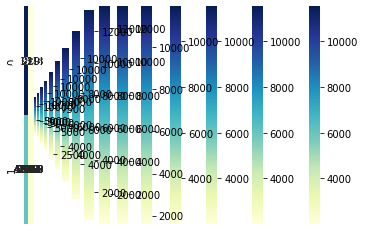

In [ ]:
# eval metric, epoc at Ir=1e-2
li = []

for change in ['auc', 'accuracy', 'balanced_accuracy', 'logloss']:
    for epoc in [10, 15, 20, 30]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = epoc
        print(change,epoc)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=[change],
            max_epochs=max_epochs, 
            patience=20,
            batch_size=1024, virtual_batch_size=128,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li.append(res)
print(li)

Device used : cpu
auc 10
epoch 0  | loss: 0.70677 | train_auc: 0.55676 | valid_auc: 0.55619 |  0:00:37s
epoch 1  | loss: 0.68271 | train_auc: 0.59011 | valid_auc: 0.55778 |  0:01:15s
epoch 2  | loss: 0.67929 | train_auc: 0.60201 | valid_auc: 0.52027 |  0:01:53s
epoch 3  | loss: 0.67511 | train_auc: 0.61857 | valid_auc: 0.55343 |  0:02:31s
epoch 4  | loss: 0.66554 | train_auc: 0.65673 | valid_auc: 0.56083 |  0:03:12s
epoch 5  | loss: 0.64403 | train_auc: 0.70475 | valid_auc: 0.54309 |  0:03:50s
epoch 6  | loss: 0.61684 | train_auc: 0.73548 | valid_auc: 0.44898 |  0:04:28s
epoch 7  | loss: 0.60053 | train_auc: 0.74936 | valid_auc: 0.44839 |  0:05:06s
epoch 8  | loss: 0.59366 | train_auc: 0.6963  | valid_auc: 0.55761 |  0:05:44s
epoch 9  | loss: 0.58304 | train_auc: 0.76291 | valid_auc: 0.55782 |  0:06:22s
Stop training because you reached max_epochs = 10 with best_epoch = 4 and best_valid_auc = 0.56083
Best weights from best epoch are automatically used!

정확도accuracy: 0.3273
정밀도precision

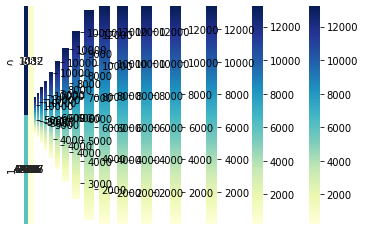

In [ ]:
# eval metric, epoc
li_default = []

for change in ['auc', 'accuracy', 'balanced_accuracy', 'logloss']:
    for epoc in [10, 15, 20, 30]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=2e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = epoc
        print(change,epoc)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=[change],
            max_epochs=max_epochs, 
            patience=20,
            batch_size=1024, virtual_batch_size=128,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li_default.append(res)
print(li_default)

In [ ]:
#batchsize
li_batch = []

for bat in [512, 1024, 2048, 4096, 8192 ]:
    for vbat in [64, 128, 256]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=2e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = 30
        print(bat,vbat)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=['accuracy'],
            max_epochs=max_epochs, 
            patience=20,
            batch_size=bat, virtual_batch_size=vbat,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li_batch.append(res)
print(li_batch)

In [ ]:
tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                    cat_dims=cat_dims,
                    cat_emb_dim=1,
                    optimizer_fn=torch.optim.Adam,
                    optimizer_params=dict(lr=1e-2),
                    scheduler_params={"step_size":50,
                                        "gamma":0.9},
                    scheduler_fn=torch.optim.lr_scheduler.StepLR,
                    mask_type='sparsemax' # "sparsemax", entmax
                    )

Device used : cpu


In [ ]:
max_epochs = 10

tab_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs, 
    patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

IndexError: ignored


정확도accuracy: 0.6908
정밀도precision: 0.7226
재현율recall: 0.0907
AUC: 0.5369
F1: 0.1612


{'AUC': 0.5368752288765796,
 'F1': 0.16117216117216115,
 '재현율recall': 0.09070087036188731,
 '정밀도precision': 0.7226277372262774,
 '정확도accuracy': 0.69085}

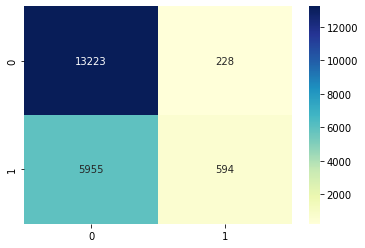

In [ ]:
y_pred_tab = tab_clf.predict(X_valid.values)
get_clf_eval(y_valid, y_pred_tab)


6


AttributeError: ignored

In [ ]:
# 제출 양식 다운로드
submit = pd.read_csv(os.path.join(folder, 'sample_submission.csv'))

# prediction 수행
df_test = pd.read_csv(os.path.join(folder, 'test.csv'))
df_test_drop = df_test.drop(columns=['ID'])
                            

 y_pred_tab = clf.predict(df_test_drop.values)
get_clf_eval(y_valid, y_pred_tab)
submit['answer'] = y_pred_tab
print(submit['answer'])


# preds = clf.predict(X_test)

IndentationError: ignored

In [ ]:
# 제출 파일 저장
submit.to_csv(os.path.join(folder, 'prediction.csv'), index=False)

In [ ]:
explain_matrix, masks = clf.explain(df_test_drop)

fig, axs = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

KeyError: ignored

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

clf = TabNetClassifier()  #TabNetRegressor()
clf.fit(
  X_train, y_train,
  eval_set=[(X_valid, y_valid)]
)
preds = clf.predict(X_test)

Device used : cpu


KeyError: ignored

#catboost   
https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_fit

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, CatBoostRegressor

In [ ]:
from catboost import CatBoostClassifier, Pool, CatBoostRegressor

clf_cat = CatBoostClassifier()
clf_cat = CatBoostRegressor(iterations=10000,
                            learning_rate=0.01,
                            depth=5, 
                            eval_metric='RMSE',
                            random_seed=23,
                            early_stopping_rounds=200,
                            logging_level='Verbose')


In [ ]:
max_epochs = 15

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
)

# Ensemble(Voting)

In [ ]:
rnd_clf = RandomForestClassifier()
lgbm_clf = LGBMClassifier()
xgb_clf = xgboost.XGBClassifier()

rid_clf = RidgeClassifier()
dtc_clf = DecisionTreeClassifier()
svm_clf = SVC()
ada_clf = AdaBoostClassifier()
gbc_clf = GradientBoostingClassifier()
bag_clf = BaggingClassifier()
ext_clf = ExtraTreesClassifier()
knn_clf = KNeighborsClassifier()
svc_clf = SVC()

# tabnet_clf = TabNetClassifier()
cat_clf = CatBoostClassifier()


NameError: ignored

In [ ]:

voting_clf = VotingClassifier(estimators=[('tab',tabnet_clf),('cat',cat_clf),('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf),
                                          ('rid', rid_clf), ('dtc', dtc_clf), ('svm', svm_clf), ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf), ('svc', svc_clf)], voting='soft')

Learning rate set to 0.06692
0:	learn: 0.6757015	total: 76.4ms	remaining: 1m 16s
1:	learn: 0.6610663	total: 102ms	remaining: 50.7s
2:	learn: 0.6485837	total: 134ms	remaining: 44.4s
3:	learn: 0.6372430	total: 176ms	remaining: 43.8s
4:	learn: 0.6262025	total: 206ms	remaining: 41s
5:	learn: 0.6178189	total: 233ms	remaining: 38.5s
6:	learn: 0.6100113	total: 259ms	remaining: 36.7s
7:	learn: 0.6031685	total: 286ms	remaining: 35.5s
8:	learn: 0.5974216	total: 312ms	remaining: 34.3s
9:	learn: 0.5921008	total: 338ms	remaining: 33.5s
10:	learn: 0.5875019	total: 364ms	remaining: 32.8s
11:	learn: 0.5833328	total: 391ms	remaining: 32.2s
12:	learn: 0.5796593	total: 439ms	remaining: 33.3s
13:	learn: 0.5761323	total: 469ms	remaining: 33s
14:	learn: 0.5726127	total: 495ms	remaining: 32.5s
15:	learn: 0.5701509	total: 521ms	remaining: 32s
16:	learn: 0.5673886	total: 546ms	remaining: 31.6s
17:	learn: 0.5651809	total: 576ms	remaining: 31.4s
18:	learn: 0.5632156	total: 605ms	remaining: 31.2s
19:	learn: 0.561

{'AUC': 0.6392975646174412,
 'F1': 0.46952458350264115,
 '재현율recall': 0.35729746444032157,
 '정밀도precision': 0.6845379146919431,
 '정확도accuracy': 0.7389}

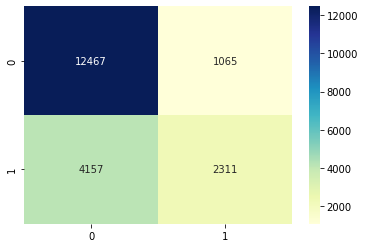

In [ ]:
for clf in (cat_clf,xgb_clf):
    clf.fit(X_train, y_train)
    y_pred_vote = clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_vote)


정확도accuracy: 0.7365
정밀도precision: 0.6752
재현율recall: 0.3635
AUC: 0.6397
F1: 0.4726


{'AUC': 0.6396966994518325,
 'F1': 0.47257806244995987,
 '재현율recall': 0.36351039260969975,
 '정밀도precision': 0.6751501286817272,
 '정확도accuracy': 0.7365}

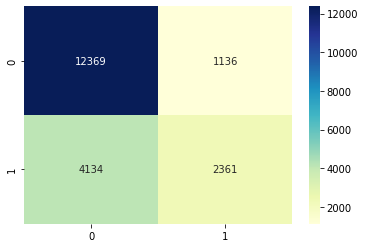

In [ ]:
get_clf_eval(y_valid, y_pred_vote)

In [ ]:
for clf in (tabnet_clf,cat_clf):
    clf.fit(X_train, y_train)
    y_pred_vote = clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_vote)

No early stopping will be performed, last training weights will be used.


KeyError: ignored

# Ensemble(Stacking)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10:	learn: 0.5921893	total: 268ms	remaining: 24.1s
11:	learn: 0.5876150	total: 292ms	remaining: 24s
12:	learn: 0.5838149	total: 315ms	remaining: 23.9s
13:	learn: 0.5801947	total: 337ms	remaining: 23.7s
14:	learn: 0.5771130	total: 359ms	remaining: 23.6s
15:	learn: 0.5743670	total: 382ms	remaining: 23.5s
16:	learn: 0.5721224	total: 408ms	remaining: 23.6s
17:	learn: 0.5700134	total: 430ms	remaining: 23.5s
18:	learn: 0.5678156	total: 453ms	remaining: 23.4s
19:	learn: 0.5658384	total: 476ms	remaining: 23.3s
20:	learn: 0.5640397	total: 506ms	remaining: 23.6s
21:	learn: 0.5624799	total: 528ms	remaining: 23.5s
22:	learn: 0.5611768	total: 550ms	remaining: 23.4s
23:	learn: 0.5593615	total: 574ms	remaining: 23.4s
24:	learn: 0.5580926	total: 597ms	remaining: 23.3s
25:	learn: 0.5566559	total: 624ms	remaining: 23.4s
26:	learn: 0.5554421	total: 645ms	remaining: 23.3s
27:	learn: 0.5539997	total: 669ms	remaining: 23.2s
28:	learn: 0.5527295	total: 692ms	remaining: 23.

{'AUC': 0.6923809039376373,
 'F1': 0.5765688215546182,
 '재현율recall': 0.5177798392084106,
 '정밀도precision': 0.650417556807147,
 '정확도accuracy': 0.75405}

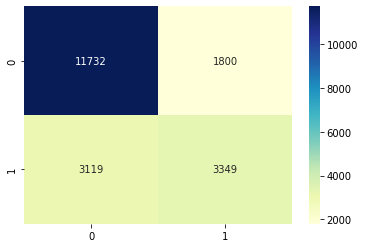

In [ ]:
stacking_clf = StackingClassifier(estimators=[('cat',cat_clf),('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf),
                                          ('rid', rid_clf), ('dtc', dtc_clf), ('svm', svm_clf), ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf), ('svc', svc_clf)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
422:	learn: 0.4776676	total: 11.2s	remaining: 15.3s
423:	learn: 0.4775775	total: 11.3s	remaining: 15.3s
424:	learn: 0.4774752	total: 11.3s	remaining: 15.3s
425:	learn: 0.4774135	total: 11.3s	remaining: 15.3s
426:	learn: 0.4772859	total: 11.3s	remaining: 15.2s
427:	learn: 0.4771602	total: 11.4s	remaining: 15.2s
428:	learn: 0.4770945	total: 11.4s	remaining: 15.2s
429:	learn: 0.4770298	total: 11.4s	remaining: 15.1s
430:	learn: 0.4769752	total: 11.4s	remaining: 15.1s
431:	learn: 0.4769121	total: 11.5s	remaining: 15.1s
432:	learn: 0.4768038	total: 11.5s	remaining: 15.1s
433:	learn: 0.4767074	total: 11.5s	remaining: 15s
434:	learn: 0.4766248	total: 11.6s	remaining: 15s
435:	learn: 0.4765238	total: 11.6s	remaining: 15s
436:	learn: 0.4764544	total: 11.6s	remaining: 15s
437:	learn: 0.4763913	total: 11.6s	remaining: 14.9s
438:	learn: 0.4763194	total: 11.7s	remaining: 14.9s
439:	learn: 0.4762335	total: 11.7s	remaining: 14.9s
440:	learn: 0.4761657	total: 11.7s	r

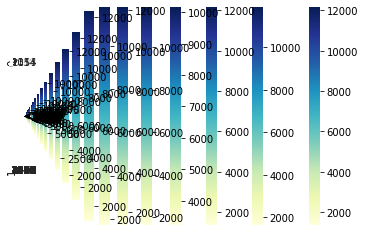

In [ ]:
import itertools
from itertools import permutations
lists = ('cat',cat_clf),('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf), ('rid', rid_clf), ('dtc', dtc_clf),  ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf)
result = []
i = 2
t=0
for j in permutations(lists, i):
    t+=1
    print(t)
    j = list(j)
    print(j)
    try:
        voting_clf = VotingClassifier(estimators=j ,  voting='soft')
        voting_clf.fit(X_train, y_train)
        y_pred_stack = voting_clf.predict(X_valid)

        # ensemble(stacking) 성능 확인
        r = get_clf_eval(y_valid, y_pred_stack)
        result.append((j, r))
        print((j, r))
    except:
        print((j, "ERROR OCCURRED"))
        result.append((j, "ERROR OCCURRED"))


In [ ]:
result

[([('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier())],
  {'AUC': 0.6649823451567167,
   'F1': 0.5249200677073538,
   '재현율recall': 0.4263672471738466,
   '정밀도precision': 0.6827299412915852,
   '정확도accuracy': 0.7474}),
 ([('rnd', RandomForestClassifier()), ('xgb', XGBClassifier())],
  {'AUC': 0.641730196896819,
   'F1': 0.4748794212218649,
   '재현율recall': 0.36098380690498016,
   '정밀도precision': 0.693775689958896,
   '정확도accuracy': 0.7387}),
 ([('rnd', RandomForestClassifier()), ('dtc', DecisionTreeClassifier())],
  {'AUC': 0.6270764589629753,
   'F1': 0.5008638173214152,
   '재현율recall': 0.509318667888787,
   '정밀도precision': 0.4926850894044628,
   '정확도accuracy': 0.66775}),
 ([('rnd', RandomForestClassifier()), ('ada', AdaBoostClassifier())],
  {'AUC': 0.6387882718228629,
   'F1': 0.46995083776462326,
   '재현율recall': 0.3577757409104797,
   '정밀도precision': 0.6845951476176556,
   '정확도accuracy': 0.73585}),
 ([('rnd', RandomForestClassifier()), ('gbc', GradientBoostingClassifier())

In [ ]:
a = 0
b = None
f = 0

for i in result:
    if i[-1]['F1'] > f:
        f = i[-1]['F1']
        a =  i[0]
        b = i[1]
print(a)
print(b)
print(f)

[('lgbm', LGBMClassifier()), ('bag', BaggingClassifier())]
{'정확도accuracy': 0.74635, '정밀도precision': 0.6486977589339794, '재현율recall': 0.4908340971585701, 'AUC': 0.6807522648718374, 'F1': 0.5588312027132795}
0.5588312027132795


# Submission

In [ ]:
# folder = '/content/drive/MyDrive/Colab Notebooks/ML study/day27 220126'

# 제출 양식 다운로드
submit = pd.read_csv(os.path.join(folder, 'sample_submission.csv'))

# prediction 수행
df_test = pd.read_csv(os.path.join(folder, 'test.csv'))
submit['answer'] = stacking_clf.predict(df_test.drop(columns=['ID']))

# 제출 파일 저장
submit.to_csv(os.path.join(folder, 'prediction.csv'), index=False)

# scikit-optimize

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 6.6 MB/s 


In [ ]:
from skopt import BayesSearchCV

In [ ]:
# X, y = load_digits(n_class=10, return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=.25, random_state=0)

# # log-uniform: understand as search over p = exp(x) by varying x
# opt = BayesSearchCV(
#     SVC(),
#     {
#         'C': (1e-6, 1e+6, 'log-uniform'),
#         'gamma': (1e-6, 1e+1, 'log-uniform'),
#         'degree': (1, 8),  # integer valued parameter
#         'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
#     },
#     n_iter=32,
#     cv=3
# )

# opt.fit(X_train, y_train)

In [ ]:
opt = BayesSearchCV(
    LGBMClassifier(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    cv=3
)
opt.fit(X_train, y_train)


BayesSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=32,
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform'),
                             'degree': (1, 8),
                             'gamma': (1e-06, 10.0, 'log-uniform'),
                             'kernel': ['linear', 'poly', 'rbf']})


정확도accuracy: 0.7533
정밀도precision: 0.6615
재현율recall: 0.4803
AUC: 0.6817
F1: 0.5565


{'AUC': 0.6817215581721928,
 'F1': 0.556504540142048,
 '재현율recall': 0.4802917442582247,
 '정밀도precision': 0.661466125240436,
 '정확도accuracy': 0.75335}

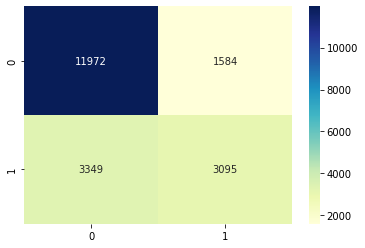

In [ ]:
y_pred_opt = opt.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_opt)


In [ ]:
opt = BayesSearchCV(
    LGBMClassifier(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=64,
    cv=5
)
opt.fit(X_train, y_train)


BayesSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=64,
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform'),
                             'degree': (1, 8),
                             'gamma': (1e-06, 10.0, 'log-uniform'),
                             'kernel': ['linear', 'poly', 'rbf']})


정확도accuracy: 0.7533
정밀도precision: 0.6615
재현율recall: 0.4803
AUC: 0.6817
F1: 0.5565


{'AUC': 0.6817215581721928,
 'F1': 0.556504540142048,
 '재현율recall': 0.4802917442582247,
 '정밀도precision': 0.661466125240436,
 '정확도accuracy': 0.75335}

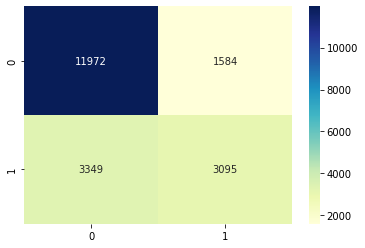

In [ ]:
y_pred_opt = opt.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_opt)


('rnd', RandomForestClassifier())

정확도accuracy: 0.7504
정밀도precision: 0.6659
재현율recall: 0.4768
AUC: 0.6802
F1: 0.5557
(('rnd', RandomForestClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166})
('lgbm', LGBMClassifier())

정확도accuracy: 0.7504
정밀도precision: 0.6659
재현율recall: 0.4768
AUC: 0.6802
F1: 0.5557
(('lgbm', LGBMClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166})
('xgb', XGBClassifier())

정확도accuracy: 0.7504
정밀도precision: 0.6659
재현율recall: 0.4768
AUC: 0.6802
F1: 0.5557
(('xgb', XGBClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166})
('dtc', DecisionTreeClassifier())

정확도accuracy: 0.7504
정밀도precision: 0.6659
재현율recall: 0.4768
AUC: 0.6802
F1: 0.5557
(('dtc', 

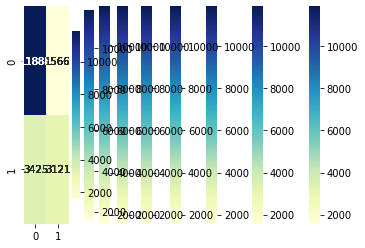

In [ ]:
lists = ('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf),  ('dtc', dtc_clf), ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf)
resultopt=[]
for i in lists:
    print(i)
    BayesSearchCV(
        i,
        {
            'C': (1e-6, 1e+6, 'log-uniform'),
            'gamma': (1e-6, 1e+1, 'log-uniform'),
            'degree': (1, 8),  # integer valued parameter
            'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
        },
        n_iter=32,
        cv=3
    )
    opt.fit(X_train, y_train)
    y_pred_opt = opt.predict(X_valid)

    # ensemble(stacking) 성능 확인
    r = get_clf_eval(y_valid, y_pred_opt)
    resultopt.append((i, r))
    print((i, r))
print(resultopt)

In [ ]:
# [(('rnd', RandomForestClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166}), 
#  (('lgbm', LGBMClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166}), 
#  (('xgb', XGBClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166}), 
#  (('dtc', DecisionTreeClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166}), 
#  (('ada', AdaBoostClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166}),
#  (('gbc', GradientBoostingClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166}), 
#  (('bag', BaggingClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166}), 
#  (('ext', ExtraTreesClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166}), 
#  (('knn', KNeighborsClassifier()), {'정확도accuracy': 0.75045, '정밀도precision': 0.6658843609985065, '재현율recall': 0.47677971280171094, 'AUC': 0.6801915510641526, 'F1': 0.5556841449301166})]


In [ ]:
searchcv = BayesSearchCV(
    ('lgbm', lgbm_clf),
    search_spaces=[
        ({'C': (0.1, 1.0)}, 19),  # 19 iterations for this subspace
        {'gamma':(0.1, 1.0)}
    ],
    n_iter=23
)

print(searchcv.total_iterations)

42



정확도accuracy: 0.7401
정밀도precision: 0.6855
재현율recall: 0.3572
AUC: 0.6397
F1: 0.4697
{'정확도accuracy': 0.7401, '정밀도precision': 0.6855270994639666, '재현율recall': 0.3572315332091868, 'AUC': 0.6396662239666471, 'F1': 0.4697000612119975}


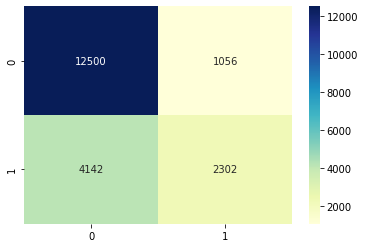

In [ ]:
# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    XGBClassifier(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    cv=3
)

opt.fit(X_train, y_train)
y_pred_opt = opt.predict(X_valid)

r = get_clf_eval(y_valid, y_pred_opt)
print(r)

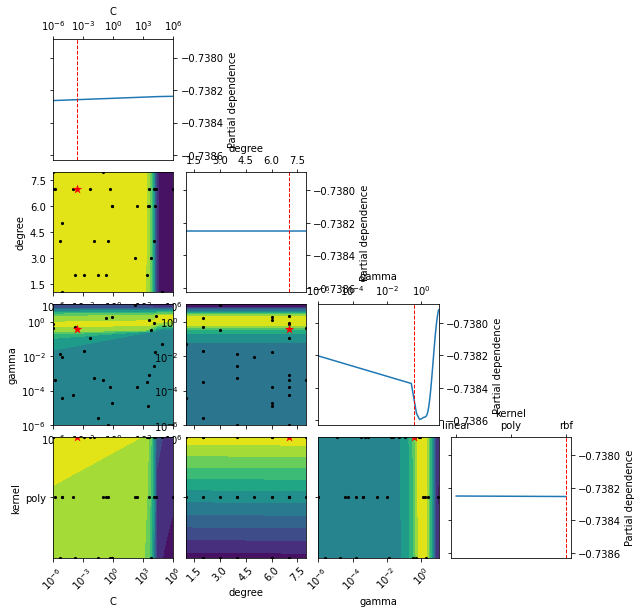

In [ ]:
from skopt.plots import plot_objective, plot_histogram
_ = plot_objective(opt.optimizer_results_[0],
                   dimensions=["C", "degree", "gamma", "kernel"],
                   n_minimum_search=int(1e8))
plt.show()


정확도accuracy: 0.7335
정밀도precision: 0.6780
재현율recall: 0.3599
AUC: 0.6381
F1: 0.4702
{'정확도accuracy': 0.7335, '정밀도precision': 0.6780389908256881, '재현율recall': 0.3598600121728545, 'AUC': 0.6381143969115688, 'F1': 0.47017892644135184}


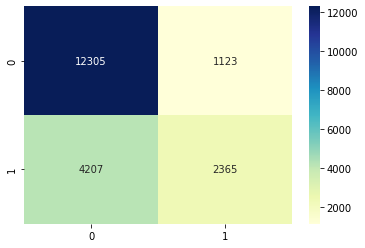

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold
# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    estimator = XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },    
    scoring = 'roc_auc',
    cv = 3,
    n_jobs = 3,
    n_iter = 32,   
    verbose = 0,
    refit = True,
    random_state = 42
)

opt.fit(X_train, y_train)
y_pred_opt = opt.predict(X_valid)

r = get_clf_eval(y_valid, y_pred_opt)
print(r)